# Assignment

Research question:

What was the effect of COVID-19 on transport emission levels in Europe, comparing the pre-pandemic period with the pandemic period?

Sub-questions:
1. Among CO2, PM10, PM2.5, and NOx emissions, which substance experienced the most substantial decline during the pandemic?
2. Which European countries exhibited the most significant and least significant differences in transport-related emissions due to the pandemic?
3. Are variations in the effect of COVID-19 on transportation emissions correlated with a country's GDP?

## Import libraries

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import math
import scipy
from scipy.signal import find_peaks
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd


## Part I - Data import

Here comes the first part of the assignment. Importing the filtered data. Create a dataframe.
Show the data in a table.


In [2]:
file_path1 = 'GHG.csv'
file_path2 = 'NOx.csv'
file_path3 = 'PM2.5.csv'
file_path4 = 'PM10.csv'
file_path5 = 'GDP.csv'


df_GHG = pd.read_csv(file_path1, sep = ';',encoding='ISO-8859-1')
df_NOx = pd.read_csv(file_path2, sep = ';',encoding='ISO-8859-1')
df_PM_2_5 = pd.read_csv(file_path3, sep = ';',encoding='ISO-8859-1')
df_PM_10 = pd.read_csv(file_path4, sep = ';',encoding='ISO-8859-1')
df_GDP = pd.read_csv(file_path5, sep = ';',encoding='ISO-8859-1')

# The file had an incorrect delimiter which caused a ParserError,
# this is solved by adding sep=';' when reading the file. 
# This file also gave some UnicodeDecodeErorr, this is solved 
# by using encoding='ISO-8859-1'



In [3]:
# Filter PM10 dataset

for i in range(30, 45):
    df_PM_10.drop(i, axis=0, inplace=True)

#Replace commas with nothing
df_PM_10['2019'] = df_PM_10['2019'].str.replace(',', '').astype(float)
df_PM_10['2020'] = df_PM_10['2020'].str.replace(',', '').astype(float)

df_PM_10

,PM10,2019,2020
0,Belgium,27438.0,25513.0
1,Bulgaria,44091.0,44525.0
2,Czechia,40567.0,37402.0
3,Denmark,23350.0,22412.0
4,Germany,195887.0,182126.0
5,Estonia,11780.0,12664.0
6,Ireland,30461.0,30287.0
7,Greece,58434.0,56342.0
8,Spain,211498.0,211698.0
9,France,277876.0,247518.0


In [4]:
# Filter code for PM2.5 data

for i in range(30, 45):
    df_PM_2_5.drop(i, axis=0, inplace=True)

#Replace commas with nothing
df_PM_2_5['2019'] = df_PM_2_5['2019'].str.replace(',', '').astype(float)
df_PM_2_5['2020'] = df_PM_2_5['2020'].str.replace(',', '').astype(float)

df_PM_2_5

,PM2.5,2019,2020
0,Belgium,18248.0,16583.0
1,Bulgaria,29519.0,31359.0
2,Czechia,27315.0,24959.0
3,Denmark,12804.0,11983.0
4,Germany,90213.0,81464.0
5,Estonia,5076.0,5135.0
6,Ireland,12588.0,12649.0
7,Greece,36117.0,34073.0
8,Spain,129891.0,133355.0
9,France,195261.0,171792.0


In [5]:
#Filtering NOx data

condition = (df_NOx['NOx'] == 'Turkiye')

# Use the boolean condition to drop the rows that meet the condition.
df_NOx = df_NOx[~condition]


#Replace commas with nothing
df_NOx['2019'] = df_NOx['2019'].str.replace(',', '').astype(float)
df_NOx['2020'] = df_NOx['2020'].str.replace(',', '').astype(float)

df_NOx

,NOx,2019,2020
0,Belgium,158542.0,139238.0
1,Bulgaria,91587.0,86581.0
2,Czechia,173719.0,156396.0
3,Denmark,96648.0,89391.0
4,Germany,1107200.0,975646.0
5,Estonia,25496.0,23238.0
6,Ireland,104218.0,96299.0
7,Greece,249825.0,222012.0
8,Spain,679237.0,599356.0
9,France,849189.0,736594.0


In [6]:
#Filtering GHG data

df_GHG = df_GHG.rename(columns={'ï»¿TIME': 'Country'})

for i in range(2012,2022):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GHG.drop(str(i), axis=1, inplace=True)

for i in range(0, 2):
    df_GHG.drop(i, axis=0, inplace=True)

# Replace commas with periods, then replace periods with nothing
df_GHG['2019'] = df_GHG['2019'].str.replace('.', '').str.replace(',', '.').astype(float)
df_GHG['2020'] = df_GHG['2020'].str.replace('.', '').str.replace(',', '.').astype(float)


df_GHG

,Country,2019,2020
2,Belgium,121677.88,110905.57
3,Bulgaria,54728.68,48459.83
4,Czechia,125394.77,114068.58
5,Denmark,48491.87,43838.10
6,Germany,824634.27,744730.64
7,Estonia,14749.79,11479.74
8,Ireland,64509.14,60243.09
9,Greece,90172.56,76798.10
10,Spain,328938.50,278715.40
11,France,450251.75,400638.57


The next code will filter the CSV files


In [8]:
#time to filter the imported data. Delete the empty column, switch the columns in chronological orders, get rid of the comma's in the numbers.

# Drop the column 'Unnamed: 2'
#df_GHG.drop('Unnamed: 2', axis=1, inplace=True)

# Save the modified DataFrame back to the CSV file
#df.to_csv('your_file.csv', index=False)

# Get the list of column names for the code that will switch the columns
#cols = list(df_GHG.columns)

# Assume you want to switch columns named 'Column1' and 'Column2'
#col1_index = cols.index('2020')
#col2_index = cols.index('2019')

# Swap the column names in the list
#cols[col1_index], cols[col2_index] = cols[col2_index], cols[col1_index]

# Reindex the DataFrame with the modified column list
#df_GHG2 = df_GHG[cols]
#df_GHG2 = df_GHG
#df_GHG2.to_csv('GHG.csv', index=False)

#getting rid of the commas in the csv file so that python can read it properly.
#df_GHG['2019'] = df_GHG['2019'].str.replace(',', '').astype(float)
#df_GHG['2020'] = df_GHG['2020'].str.replace(',', '').astype(float)
#df_GHG.to_csv('GHG.csv', index=False)



In [9]:
df_GDP

,ï»¿TIME,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),18.400,19.200,19.900,20.300,21.200,22.000,23.2,24.6,25.3,...,26.0,26.6,27.5,28.2,29.3,30.3,31.3,30.0,32.500,35.200
2,European Union - 28 countries (2013-2020),18.800,19.700,20.400,20.900,21.800,22.600,23.8,25.0,25.7,...,26.4,27.0,27.9,28.5,29.6,30.5,31.5,30.0,:,:
3,European Union - 27 countries (2007-2013),18.900,19.800,20.400,21.000,21.900,22.700,23.8,25.1,25.8,...,26.5,27.1,28.0,28.6,29.7,30.6,31.6,30.1,:,:
4,Euro area â 20 countries (from 2023),20.900,21.800,22.500,22.900,23.700,24.600,25.8,27.1,27.7,...,28.0,28.5,29.4,30.2,31.2,32.1,33.1,31.5,33.900,36.600
5,Euro area - 19 countries (2015-2022),21.100,22.000,22.600,23.100,23.800,24.700,26.0,27.3,27.8,...,28.2,28.7,29.6,30.3,31.4,32.3,33.2,31.6,34.000,36.700
6,Belgium,23.100,23.800,24.800,25.400,26.200,27.200,28.0,29.0,29.4,...,31.5,32.2,33.2,33.8,34.6,35.6,36.8,35.7,39.000,42.200
7,Bulgaria,5.300,5.800,6.400,6.900,7.500,8.300,9.0,10.0,10.9,...,12.0,12.6,13.2,13.9,14.7,15.6,16.6,16.6,18.600,20.700
8,Czechia,13.500,14.600,15.000,16.000,17.100,18.100,19.0,20.7,21.6,...,22.2,23.3,24.4,25.1,26.7,27.9,29.2,28.0,29.700,32.000
9,Denmark,23.800,24.400,25.100,25.300,26.900,28.000,29.7,30.8,32.0,...,33.7,34.3,35.3,36.1,38.0,39.0,39.5,39.9,43.000,48.100


In [7]:
df_GDP = df_GDP.rename(columns={'ï»¿TIME': 'Country'})

for i in range(2000, 2023):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GDP.drop(str(i), axis=1, inplace=True)

for i in range(0, 6):
    df_GDP.drop(i, axis=0, inplace=True)

for i in range(43, 46):
    df_GDP.drop(i, axis=0, inplace=True)

#df_GDP['2019'] = df_GDP['2019'].str.replace(',', '').astype(float)
#df_GDP['2020'] = df_GDP['2020'].str.replace(',', '').astype(float)

df_GDP['Country'] = df_GDP['Country'].replace('TÃ¼rkiye', 'Turkiye')

df_GDP

,Country,2019,2020
6,Belgium,36.8,35.7
7,Bulgaria,16.6,16.6
8,Czechia,29.2,28.0
9,Denmark,39.5,39.9
10,Germany,37.9,37.0
11,Estonia,25.8,25.8
12,Ireland,59.3,61.6
13,Greece,20.6,18.6
14,Spain,28.5,24.9
15,France,33.1,31.4


## Part II - Data processing

#### 1. Among GHG, NOx, PM2.5 and PM10 emissions, which substance experienced the most substantial decline during the pandemic?

Total GHG emissions in 2019 3835270.83
Total GHG emissions in 2020 3460530.15
The percentual change is 9.77 %


Total NOx emissions in 2019 6458840.0
Total NOx emissions in 2020 5797344.0
The percentual change is 10.24 %


Total PM2.5 emissions in 2019 1406101.0
Total PM2.5 emissions in 2020 1337569.0
The percentual change is 4.87 %


Total PM10 emissions in 2019 2129326.0
Total PM10 emissions in 2020 2058684.0
The percentual change is 3.32 %


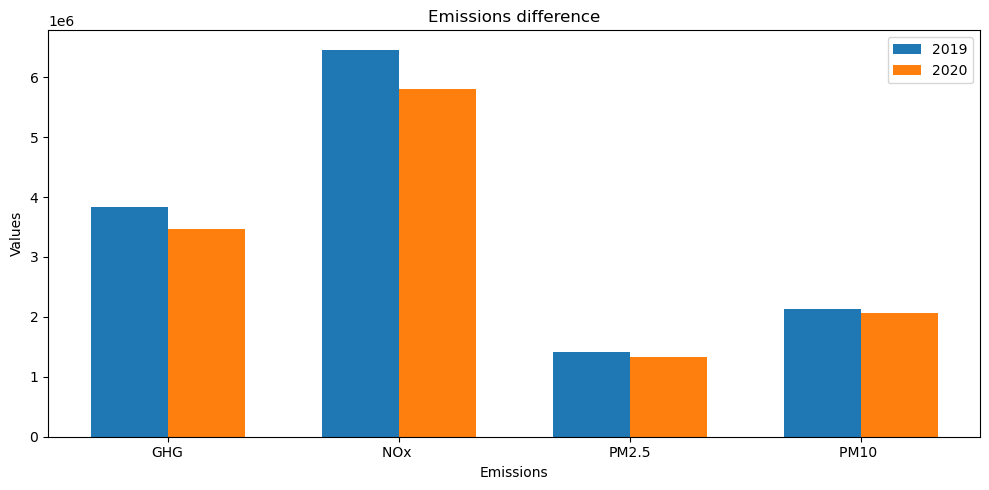

In [8]:
# we first get the total value of an emission in the year 2019 and 2020 of all the data set countries
# we start with GHG emissions and eventually want to do all other emissions as well
# in the end we compare the differences in a bar chart to get to our conclusion of which substance has experienced the biggest decline 


# Getting the sum of the column 2019 and 2020 of the GHG dataset
total_GHG_emissions_2019 = round(df_GHG['2019'].sum(),2)
total_GHG_emissions_2020 = round(df_GHG['2020'].sum(),2)
difference_GHG = 100 - (total_GHG_emissions_2020/total_GHG_emissions_2019) * 100

total_NOx_emissions_2019 = round(df_NOx['2019'].sum(),2)
total_NOx_emissions_2020 = round(df_NOx['2020'].sum(),2)
difference_NOx = 100 - (total_NOx_emissions_2020/total_NOx_emissions_2019) * 100 

total_PM_2_5_emissions_2019 = round(df_PM_2_5['2019'].sum(),2)
total_PM_2_5_emissions_2020 = round(df_PM_2_5['2020'].sum(),2)
difference_PM_2_5 = 100 - (total_PM_2_5_emissions_2020/total_PM_2_5_emissions_2019) * 100

total_PM_10_emissions_2019 = round(df_PM_10['2019'].sum(),2)
total_PM_10_emissions_2020 = round(df_PM_10['2020'].sum(),2)
difference_PM_10 = 100 - (total_PM_10_emissions_2020/total_PM_10_emissions_2019) * 100

#Print the total emissions just to check if the summation code works.
print('Total GHG emissions in 2019', str(total_GHG_emissions_2019))
print('Total GHG emissions in 2020', str(total_GHG_emissions_2020))
print('The percentual change is', round(difference_GHG,2), '%')
print('\n')
print('Total NOx emissions in 2019', str(total_NOx_emissions_2019))
print('Total NOx emissions in 2020', str(total_NOx_emissions_2020))
print('The percentual change is', round(difference_NOx,2), '%')
print('\n')
print('Total PM2.5 emissions in 2019', str(total_PM_2_5_emissions_2019))
print('Total PM2.5 emissions in 2020', str(total_PM_2_5_emissions_2020))
print('The percentual change is', round(difference_PM_2_5,2), '%')
print('\n')
print('Total PM10 emissions in 2019', str(total_PM_10_emissions_2019))
print('Total PM10 emissions in 2020', str(total_PM_10_emissions_2020))
print('The percentual change is', round(difference_PM_10,2), '%')


Emissions = ['GHG', 'NOx ', 'PM2.5', 'PM10 ']
group1_values = [total_GHG_emissions_2019, total_NOx_emissions_2019, total_PM_2_5_emissions_2019, total_PM_10_emissions_2019]
group2_values = [total_GHG_emissions_2020, total_NOx_emissions_2020, total_PM_2_5_emissions_2020, total_PM_10_emissions_2020]

#Values = [total_GHG_emissions_2019, total_GHG_emissions_2020, total_NOx_emissions_2019, total_NOx_emissions_2020
#            , total_PM_2_5_emissions_2019, total_PM_2_5_emissions_2020, total_PM_10_emissions_2019 , total_PM_10_emissions_2020]

# Create bar plot

# Number of Emissions types
n_emissions = len(Emissions)

# Positions of the left bar-boundaries
bar_width = 0.4  # Width of the bars
index = np.arange(n_emissions)  # Array with elements [0, 1, 2, 3] for 4 categories


# Now to adjust the positions for group spacing, increase the index gap
space_between_groups = 0.2  # Can adjust for more space between groups
index = index * (1 + space_between_groups)  # Scale up indices for spacing

fig, ax = plt.subplots(figsize=(10, 5))

bar1 = ax.bar(index - bar_width/2, group1_values, bar_width, label='2019')
bar2 = ax.bar(index + bar_width/2, group2_values, bar_width, label='2020')


# Add some text for labels, title and axes ticks
ax.set_xlabel('Emissions')
ax.set_ylabel('Values')
ax.set_title('Emissions difference')
ax.set_xticks(index)
ax.set_xticklabels(Emissions)
ax.legend()

# Create a bit more space around the plot for aesthetics
plt.tight_layout()

# Show the figure
plt.show()

#### 2. Which European countries exhibited the most significant and least significant differences in transport-related emissions due to the pandemic?

In [9]:
df_GHG.head()


,Country,2019,2020
2,Belgium,121677.88,110905.57
3,Bulgaria,54728.68,48459.83
4,Czechia,125394.77,114068.58
5,Denmark,48491.87,43838.10
6,Germany,824634.27,744730.64


In [10]:
df_GHG = df_GHG.rename(columns={'ï»¿TIME': 'Country'})

for i in range(2012,2022):
    if i == 2019 or i == 2020:
        continue
    else:
        df_GHG.drop(str(i), axis=1, inplace=True)

for i in range(0, 2):
    df_GHG.drop(i, axis=0, inplace=True)

# Replace commas with periods, then replace periods with nothing
df_GHG['2019'] = df_GHG['2019'].str.replace('.', '').str.replace(',', '.').astype(float)
df_GHG['2020'] = df_GHG['2020'].str.replace('.', '').str.replace(',', '.').astype(float)


df_GHG

KeyError: "['2012'] not found in axis"

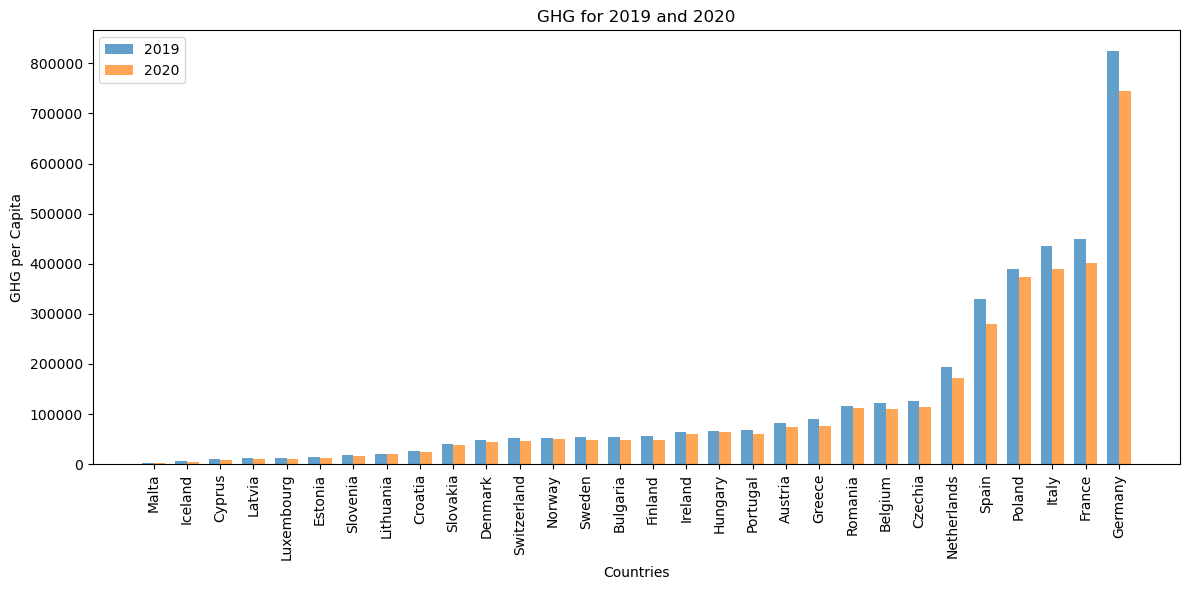

In [11]:
# Sample data
countries = df_GHG['Country']
ghg_2019 = df_GHG['2019']
ghg_2020 = df_GHG['2020']

# Sort data
sort_indices = np.argsort(ghg_2019)

countries_sorted = countries.iloc[sort_indices]
ghg_2019_sorted = ghg_2019.iloc[sort_indices]
ghg_2020_sorted = ghg_2020.iloc[sort_indices]

# Create an array of x values for the bar positions
x = np.arange(len(countries))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, ghg_2019_sorted, bar_width, label='2019', alpha=0.7)
plt.bar(x + bar_width/2, ghg_2020_sorted, bar_width, label='2020', alpha=0.7)

# Set the x-tick labels to be the country names
plt.xticks(x, countries_sorted, rotation=90)

# Set labels and title
plt.xlabel('Countries')
plt.ylabel('GHG per Capita')
plt.title('GHG for 2019 and 2020')
plt.legend()

plt.tight_layout()
plt.show()


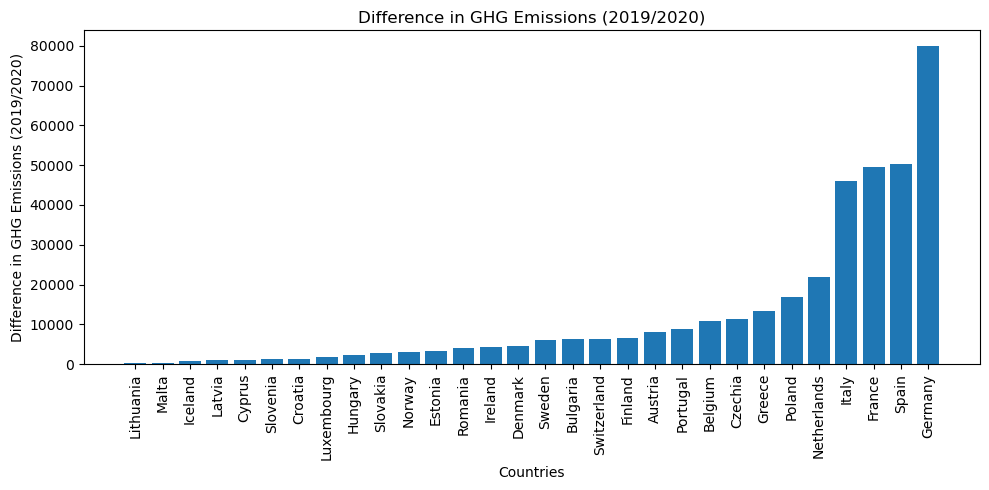

In [12]:
# Calculate the differences between 2019 and 2020
difference = df_GHG['2019'] - df_GHG['2020']

# Sort the data
sort_indices = np.argsort(difference)
countries_sorted = df_GHG['Country'].iloc[sort_indices]
difference_sorted = difference.iloc[sort_indices]

# Creating the bar plot
plt.figure(figsize=(10, 5))
plt.bar(countries_sorted, difference_sorted)
plt.xlabel('Countries')
plt.ylabel('Difference in GHG Emissions (2019/2020)')
plt.title('Difference in GHG Emissions (2019/2020)')
plt.xticks(rotation=90)

# Displaying the plot
plt.tight_layout()
plt.show()


#### 3. Are variations in the effect of COVID-19 on transportation emissions correlated with a country's GDP?

In [13]:
df_GDP.head()

,Country,2019,2020
6,Belgium,36.8,35.7
7,Bulgaria,16.6,16.6
8,Czechia,29.2,28.0
9,Denmark,39.5,39.9
10,Germany,37.9,37.0


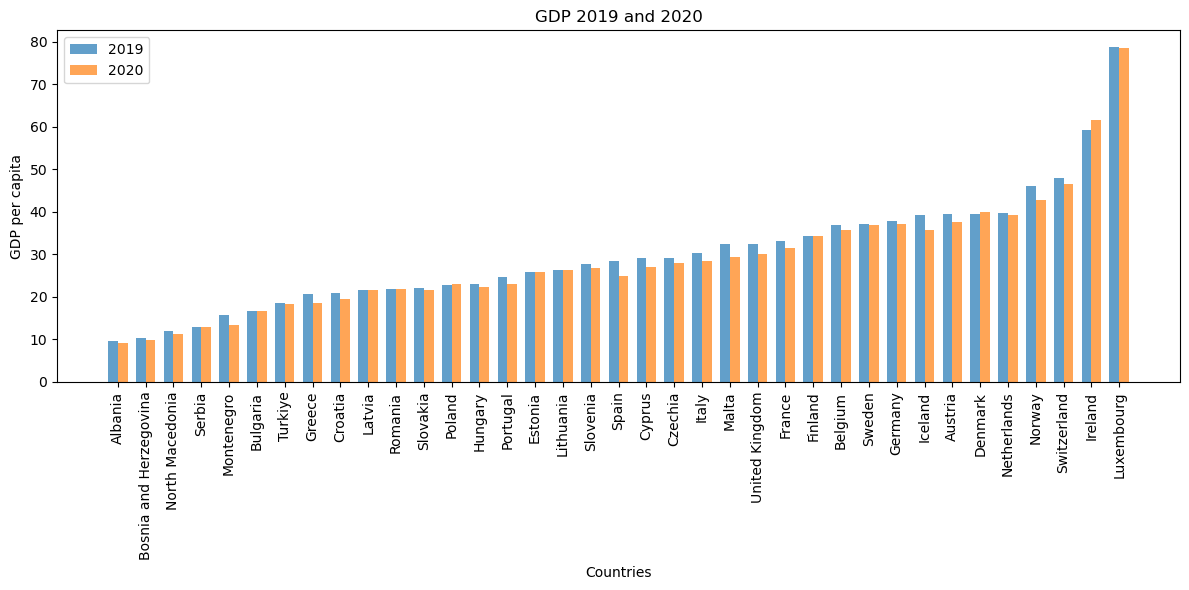

In [14]:
# Sample data
countries2 = df_GDP['Country']
gdp_2019 = df_GDP['2019']
gdp_2020 = df_GDP['2020']

# Sort the data in ascending order based on GDP for the year 2019
sorted_indices = np.argsort(gdp_2019)
countries2 = countries2.iloc[sorted_indices]
gdp_2019 = gdp_2019.iloc[sorted_indices]
gdp_2020 = gdp_2020.iloc[sorted_indices]

# Create an array of x values for the bar positions
x = np.arange(len(countries2))

# Set the width of the bars
bar_width = 0.35

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, gdp_2019, bar_width, label='2019', alpha=0.7)
plt.bar(x + bar_width/2, gdp_2020, bar_width, label='2020', alpha=0.7)

# Set the x-tick labels to be the country names
plt.xticks(x, countries2, rotation=90)

# Set labels and title
plt.xlabel('Countries')
plt.ylabel('GDP per capita')
plt.title('GDP 2019 and 2020')
plt.legend()

plt.tight_layout()
plt.show()

Difference in GDP per country


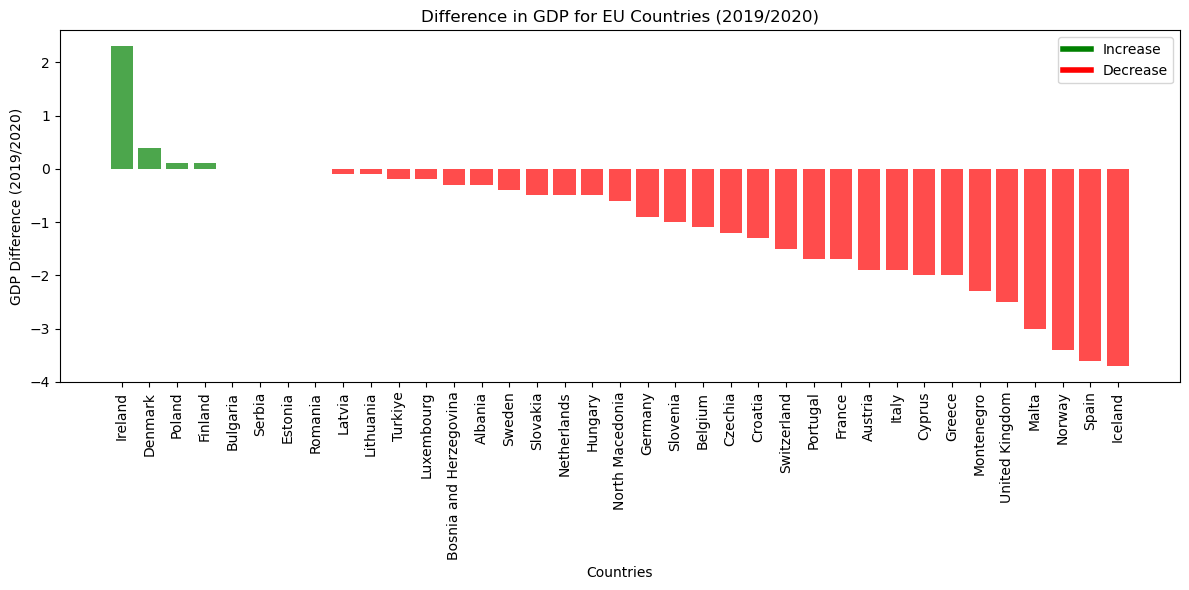

In [16]:

# Calculate the GDP difference for each country
df_GDP['GDP Difference'] = df_GDP['2020'] - df_GDP['2019']

# Create a new DataFrame containing only the relevant columns
df_GDP_difference = df_GDP[['Country', 'GDP Difference']]

# Sort the data by the GDP difference in descending order
df_GDP_difference = df_GDP_difference.sort_values(by='GDP Difference', ascending=False)

# Create a bar plot with green and red bars
plt.figure(figsize=(12, 6))
colors = ['green' if x >= 0 else 'red' for x in df_GDP_difference['GDP Difference']]
bars = plt.bar(df_GDP_difference['Country'], df_GDP_difference['GDP Difference'], color=colors, alpha=0.7)

# Add a legend with colored labels
increase_bar = plt.Line2D([0], [0], color='green', lw=4)
decrease_bar = plt.Line2D([0], [0], color='red', lw=4)
plt.legend([increase_bar, decrease_bar], ['Increase', 'Decrease'])

plt.xlabel('Countries')
plt.ylabel('GDP Difference (2019/2020)')
plt.title('Difference in GDP for EU Countries (2019/2020)')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the bar plot
plt.show()




Taking GDP from 2020, we are going to divide the countries in 3 categories: low, medium and high GDP. This, to later look at the changes of GHG emissions within the countries

In [17]:
# Define the group boundaries based on GDP values from 2020
group_boundaries = [0, 25, 50, float('inf')]  # Adjust the boundaries as needed

# Create labels for the groups
group_labels = ['Low GDP', 'Medium GDP', 'High GDP']

# Use numpy's digitize function to assign countries to groups
group_assignment = np.digitize(gdp_2020, group_boundaries)

# Initialize empty lists for each group
low_gdp_countries = []
medium_gdp_countries = []
high_gdp_countries = []

# Populate the lists based on group assignment
for i, group in enumerate(group_assignment):
    if group == 1:
        low_gdp_countries.append(countries2.iloc[i])
    elif group == 2:
        medium_gdp_countries.append(countries2.iloc[i])
    elif group == 3:
        high_gdp_countries.append(countries2.iloc[i])

# Print the countries in each group
print("Low GDP Countries:")
print(low_gdp_countries)

print("\nMedium GDP Countries:")
print(medium_gdp_countries)

print("\nHigh GDP Countries:")
print(high_gdp_countries)

Low GDP Countries:
['Albania', 'Bosnia and Herzegovina', 'North Macedonia', 'Serbia', 'Montenegro', 'Bulgaria', 'Turkiye', 'Greece', 'Croatia', 'Latvia', 'Romania', 'Slovakia', 'Poland', 'Hungary', 'Portugal', 'Spain']

Medium GDP Countries:
['Estonia', 'Lithuania', 'Slovenia', 'Cyprus', 'Czechia', 'Italy', 'Malta', 'United Kingdom', 'France', 'Finland', 'Belgium', 'Sweden', 'Germany', 'Iceland', 'Austria', 'Denmark', 'Netherlands', 'Norway', 'Switzerland']

High GDP Countries:
['Ireland', 'Luxembourg']


To see if there is an effect between GDP per country and difference in GHG emission-difference due to transport between 2019 and 2020, a scatterplot is made. On the x-axis the GDP is shown of the EU countries in 2020 and on the y-axis we have shown the difference in GHG between 2019 and 2020, which is also shown per country in a barplot above. When you put those two together, conclusions can be made about the influence of GDP per country and the grip they have on GHG emissions.

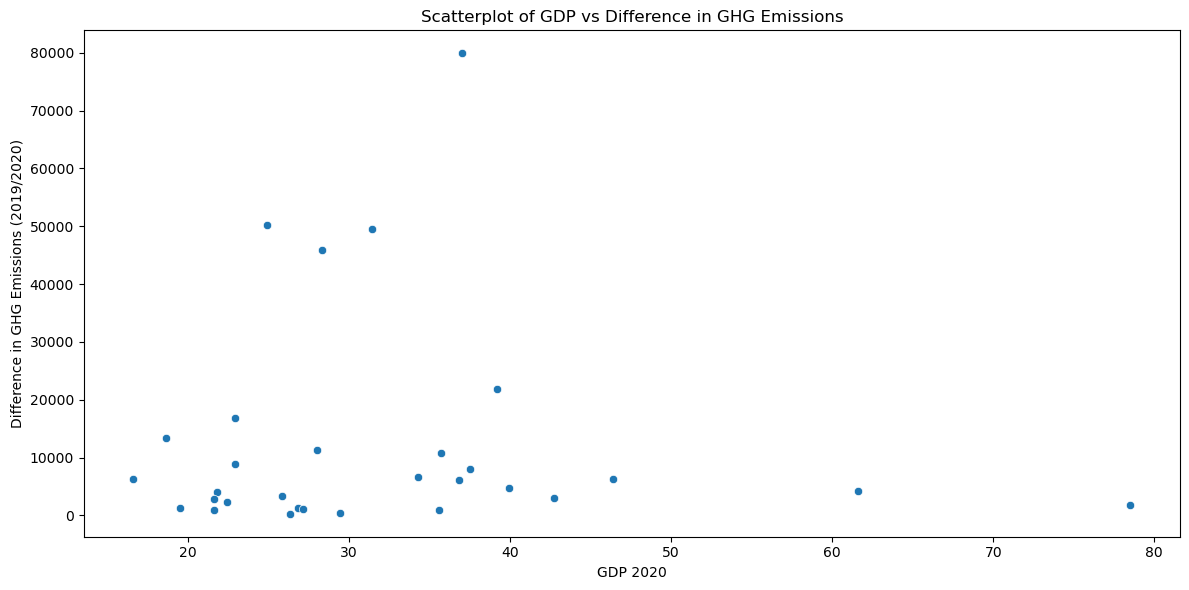

In [43]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for GDP and GHG difference
gdp_df = pd.DataFrame({
    'Country': countries2,
    'GDP 2019': gdp_2019,
    'GDP 2020': gdp_2020
})

ghg_df = pd.DataFrame({
    'Country': countries_sorted,
    'Difference in GHG Emissions (2019/2020)': difference_sorted
})

# Merge the two DataFrames on the 'Country' column
merged_data = pd.merge(gdp_df, ghg_df, on='Country')

# Create a scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='GDP 2020', y='Difference in GHG Emissions (2019/2020)')

# Add labels and title
plt.xlabel('GDP 2020')
plt.ylabel('Difference in GHG Emissions (2019/2020)')
plt.title('Scatterplot of GDP vs Difference in GHG Emissions')

# Show the plot
plt.tight_layout()
plt.show()


In [39]:
#old code from lise, this doesnt work but dont want to delete it just yet haha

# Maak lege lijsten voor elk GHG emissieverschil in de categorieën
low_gdp_ghg_difference = []
medium_gdp_ghg_difference = []
high_gdp_ghg_difference = []

# Ga door elk land en GHG emissieverschil en wijs deze toe aan de juiste categorie
for country, difference in zip(filtered_countries2, difference):
    if country in low_gdp_countries:
        low_gdp_ghg_difference.append(ghg_diff)
        medium_gdp_ghg_difference.append(None)  # Vul de andere categorieën met None
        high_gdp_ghg_difference.append(None)
    elif country in medium_gdp_countries:
        low_gdp_ghg_difference.append(None)
        medium_gdp_ghg_difference.append(ghg_diff)
        high_gdp_ghg_difference.append(None)
    elif country in high_gdp_countries:
        low_gdp_ghg_difference.append(None)
        medium_gdp_ghg_difference.append(None)
        high_gdp_ghg_difference.append(ghg_diff)

# Creëer een DataFrame met de gegevens
dataframe_new = pd.DataFrame({
    'Country': filtered_countries2,
    'Low GDP GHG Difference': low_gdp_ghg_difference,
    'Medium GDP GHG Difference': medium_gdp_ghg_difference,
    'High GDP GHG Difference': high_gdp_ghg_difference
})


In [40]:
dataframe_new.head(5)

,Country,Low GDP GHG Difference,Medium GDP GHG Difference,High GDP GHG Difference


In [35]:
#old code from lise, this doesnt work but dont want to delete it just yet haha
import seaborn as sns
import matplotlib.pyplot as plt

# Creëer de scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataframe_new, x=gdp_2020, y='GHG Difference', hue='GDP Category', palette='Set1', s=100)

# Voeg labels en titel toe
plt.xlabel('GDP (2020)')
plt.ylabel('GHG Difference')
plt.title('Scatterplot van GDP en GHG Difference per categorie')

# Toon de legende
plt.legend(title='GDP Category')

# Laat de plot zien
plt.show()


ValueError: Could not interpret value `GHG Difference` for parameter `y`

<Figure size 1200x600 with 0 Axes>

In [ ]:
#old code from lise, this doesnt work but dont want to delete it just yet haha
# Sample data
countries2 = df_GDP['Country']
gdp_2019 = df_GDP['2019']
gdp_2020 = df_GDP['2020']

# Calculate the differences
gdp_difference = gdp_2020 - gdp_2019

# Sort the data in descending order based on GDP difference
sorted_indices = np.argsort(gdp_difference)[::-1]  # Reverse the order
countries_sorted = countries2.iloc[sorted_indices]
gdp_difference_sorted = gdp_difference.iloc[sorted_indices]

# Creating a bar plot of the differences
plt.figure(figsize=(12, 6))
plt.bar(countries_sorted, gdp_difference_sorted, color='green', alpha=0.7)
plt.xlabel('Countries')
plt.ylabel('GDP difference (2019/2020)')
plt.title('Difference in GDP 2019/2020')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()




KeyError: 'Country'

## Part III - Data visualisation

Conclusion. Relate found info from Part II to our RQ. Perhaps with graphs, maps, etc. 